In [391]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [392]:
pip install pandas 

Note: you may need to restart the kernel to use updated packages.


In [393]:
pip install matplotlib

In [ ]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install xgboost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import mutual_info_regression
from xgboost import XGBRegressor



In [ ]:
Train_data=pd.read_csv("C:\\Users\\Admin\\Desktop\\Intern\\Train.csv")

In [ ]:
Test_data=pd.read_csv("C:\\Users\\Admin\\Desktop\\Intern\\Test.csv")

In [ ]:
Train_data.head()
Test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
print('Train_data:',Train_data.shape)
print('Test_data:',Test_data.shape)

Train_data: (8523, 12)
Test_data: (5681, 11)


In [ ]:
Train_columns=list(Train_data.columns)
print(Train_columns)

['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales']


In [ ]:
Test_columns=list(Test_data.columns)


In [ ]:
for i in Train_columns:
        print(i)

Item_Identifier
Item_Weight
Item_Fat_Content
Item_Visibility
Item_Type
Item_MRP
Outlet_Identifier
Outlet_Establishment_Year
Outlet_Size
Outlet_Location_Type
Outlet_Type
Item_Outlet_Sales


In [ ]:
for i in Test_columns:
        print(i)

Item_Identifier
Item_Weight
Item_Fat_Content
Item_Visibility
Item_Type
Item_MRP
Outlet_Identifier
Outlet_Establishment_Year
Outlet_Size
Outlet_Location_Type
Outlet_Type


In [ ]:
Train_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
Train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [ ]:
Train_data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
Test_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [ ]:
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [ ]:
Test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,4705.0,12.695633,4.664849,4.555,8.645000,12.500000,16.700000,21.350000
Item_Visibility,5681.0,0.065684,0.051252,0.000,0.027047,0.054154,0.093463,0.323637
Item_MRP,5681.0,141.023273,61.809091,31.990,94.412000,141.415400,186.026600,266.588400
Outlet_Establishment_Year,5681.0,1997.828903,8.372256,1985.000,1987.000000,1999.000000,2004.000000,2009.000000


In [ ]:
Train_data['Item_Weight']=Train_data['Item_Weight'].fillna(Train_data['Item_Weight'].mean())


Train_data.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
Test_data['Item_Weight']=Test_data['Item_Weight'].fillna(Test_data['Item_Weight'].mean())


Test_data['Outlet_Size'].value_counts()
Test_data['Outlet_Size'].fillna('Medium', inplace=True)

In [ ]:
Test_data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

C:\Users\Admin\AppData\Local\Temp\ipykernel_1952\1728459196.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Train_data[i].dropna())


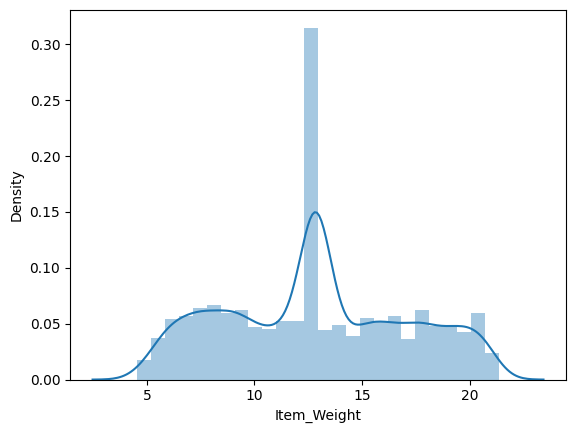

C:\Users\Admin\AppData\Local\Temp\ipykernel_1952\1728459196.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Train_data[i].dropna())


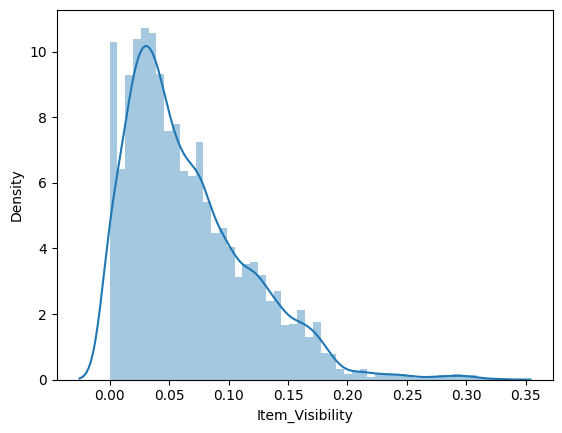

C:\Users\Admin\AppData\Local\Temp\ipykernel_1952\1728459196.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Train_data[i].dropna())


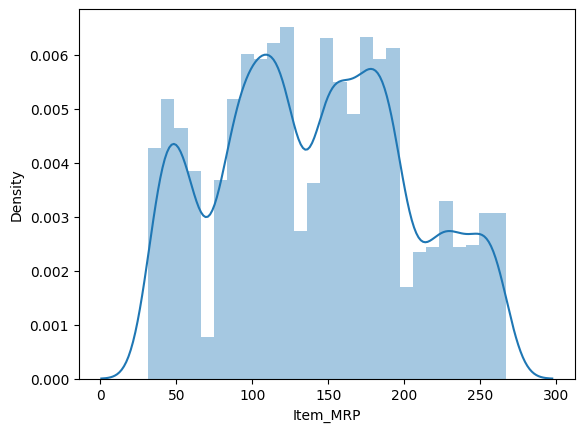

C:\Users\Admin\AppData\Local\Temp\ipykernel_1952\1728459196.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Train_data[i].dropna())


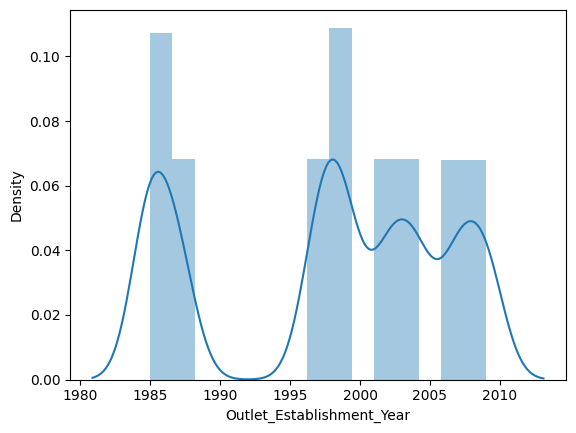

C:\Users\Admin\AppData\Local\Temp\ipykernel_1952\1728459196.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Train_data[i].dropna())


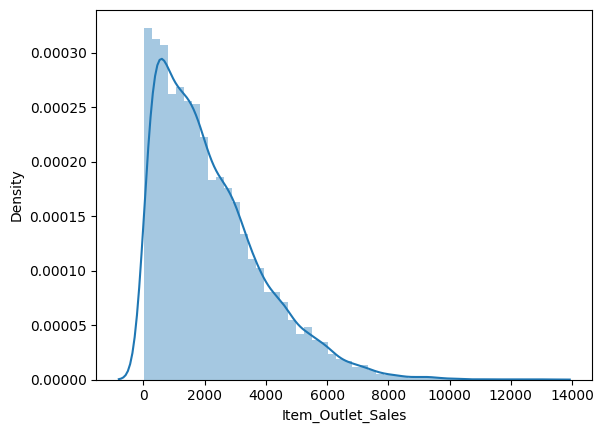

In [ ]:
for i in Train_data.describe().columns:
      sns.distplot(Train_data[i].dropna())
      plt.show()

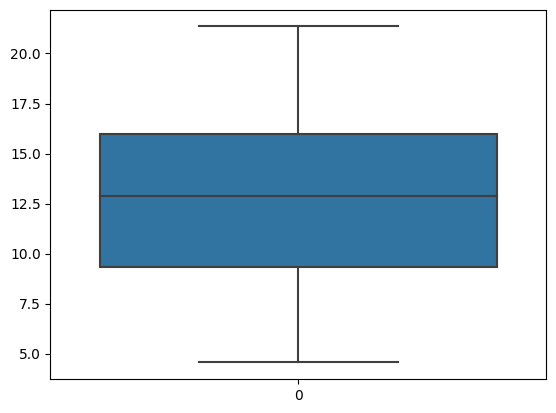

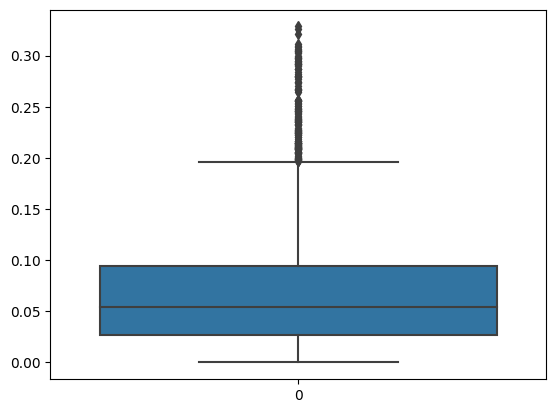

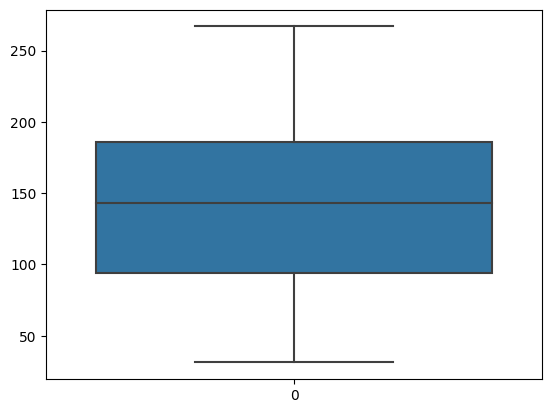

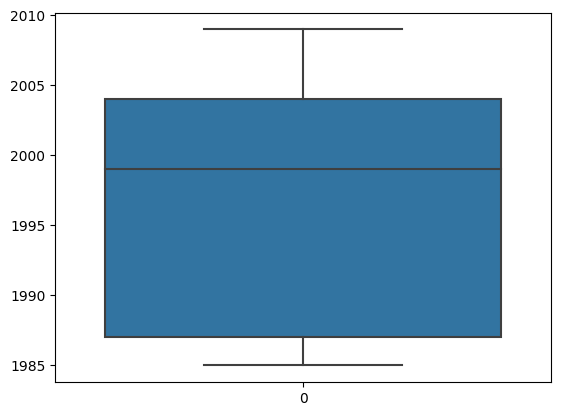

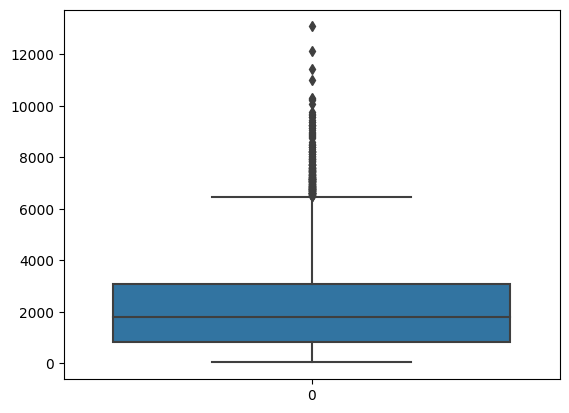

In [ ]:
for i in Train_data.describe().columns:
      sns.boxplot(Train_data[i].dropna())
      plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_1952\2428928933.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Train_data[i].dropna())


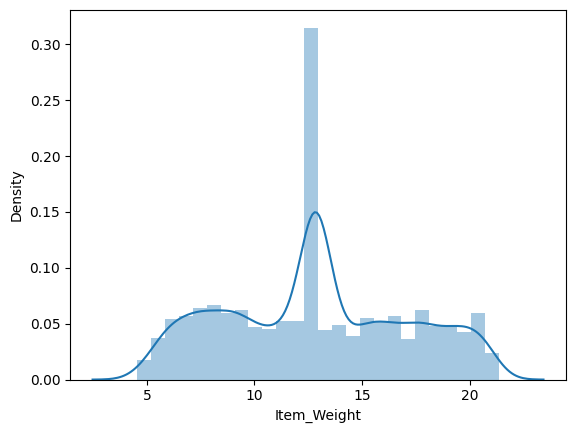

C:\Users\Admin\AppData\Local\Temp\ipykernel_1952\2428928933.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Train_data[i].dropna())


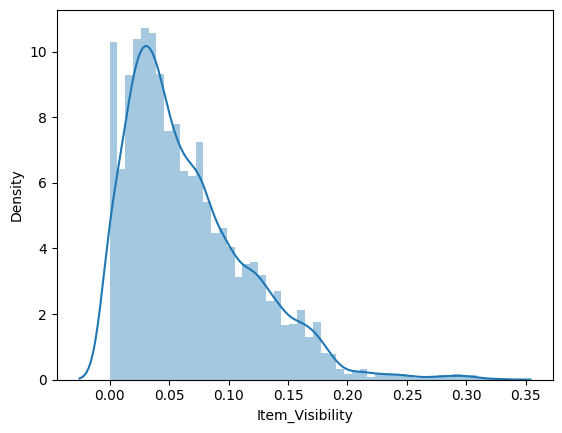

C:\Users\Admin\AppData\Local\Temp\ipykernel_1952\2428928933.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Train_data[i].dropna())


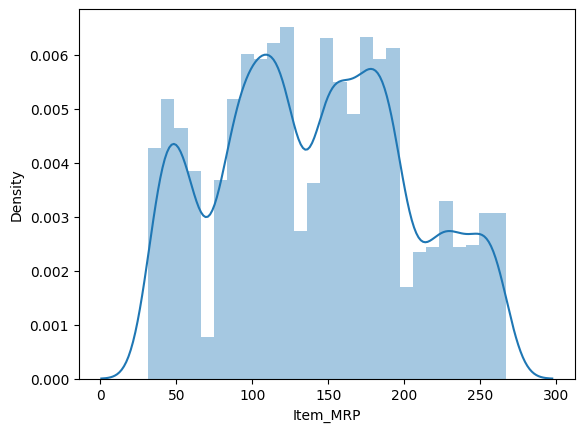

C:\Users\Admin\AppData\Local\Temp\ipykernel_1952\2428928933.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Train_data[i].dropna())


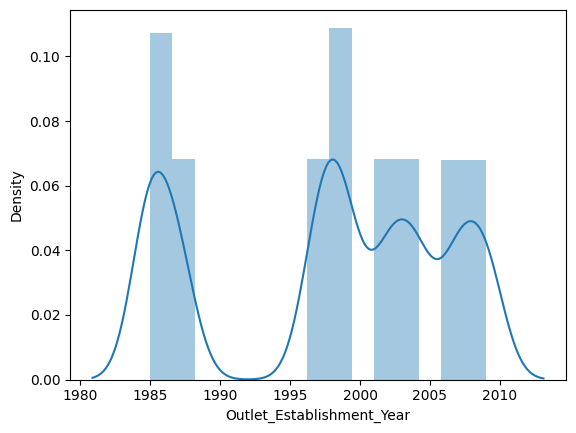

In [ ]:
for i in Test_data.describe().columns:
      sns.distplot(Train_data[i].dropna())
      plt.show()

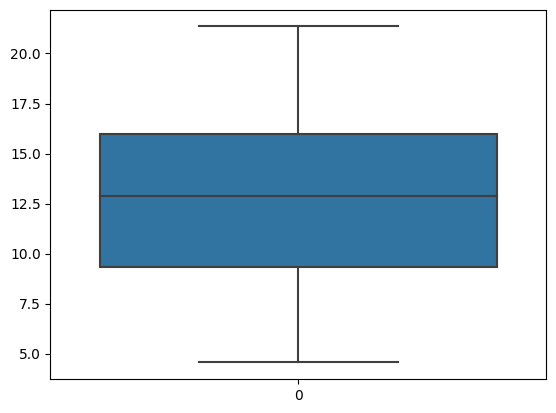

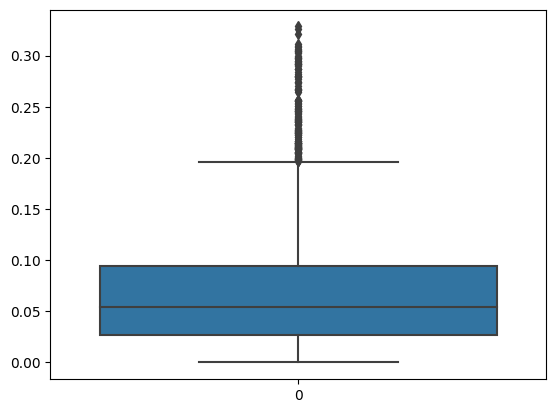

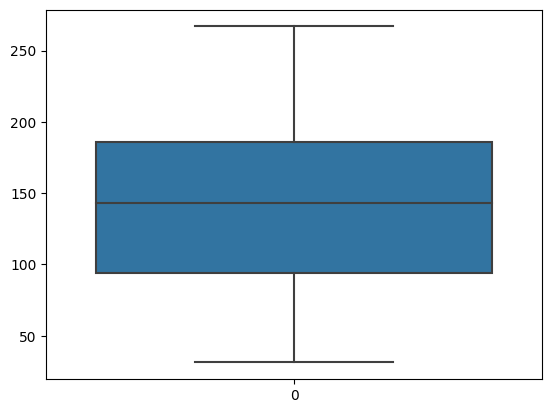

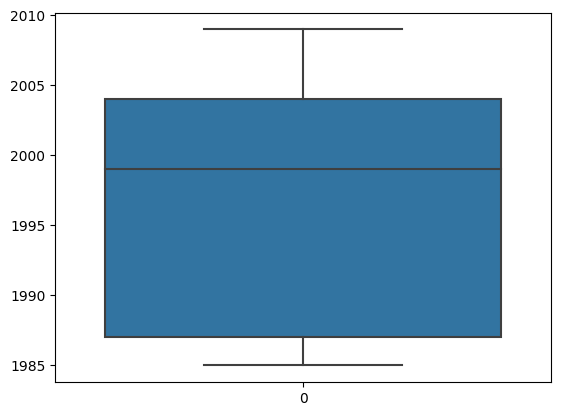

In [ ]:
for i in Test_data.describe().columns:
      sns.boxplot(Train_data[i].dropna())
      plt.show()

Text(0, 0.5, 'Visibility')

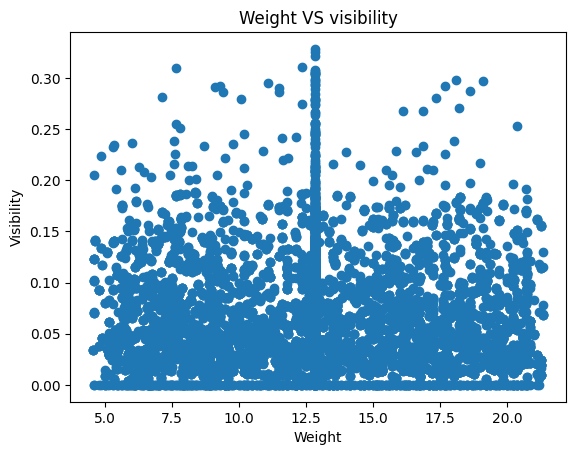

In [ ]:
plt.scatter(Train_data.Item_Weight, Train_data.Item_Visibility)
plt.title('Weight VS visibility')
plt.xlabel('Weight')
plt.ylabel('Visibility')

In [ ]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Text(0, 0.5, 'Visibility')

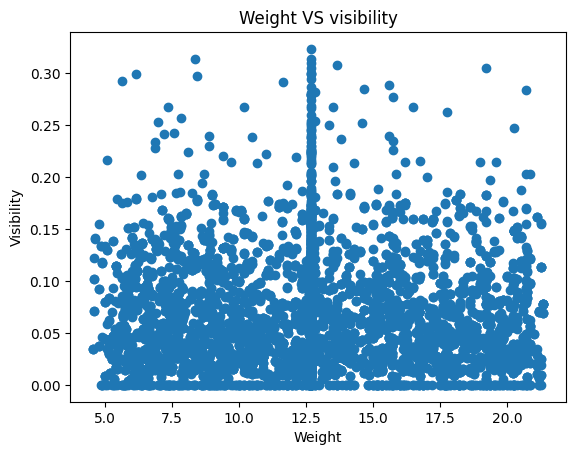

In [ ]:
plt.scatter(Test_data.Item_Weight, Test_data.Item_Visibility)
plt.title('Weight VS visibility')
plt.xlabel('Weight')
plt.ylabel('Visibility')

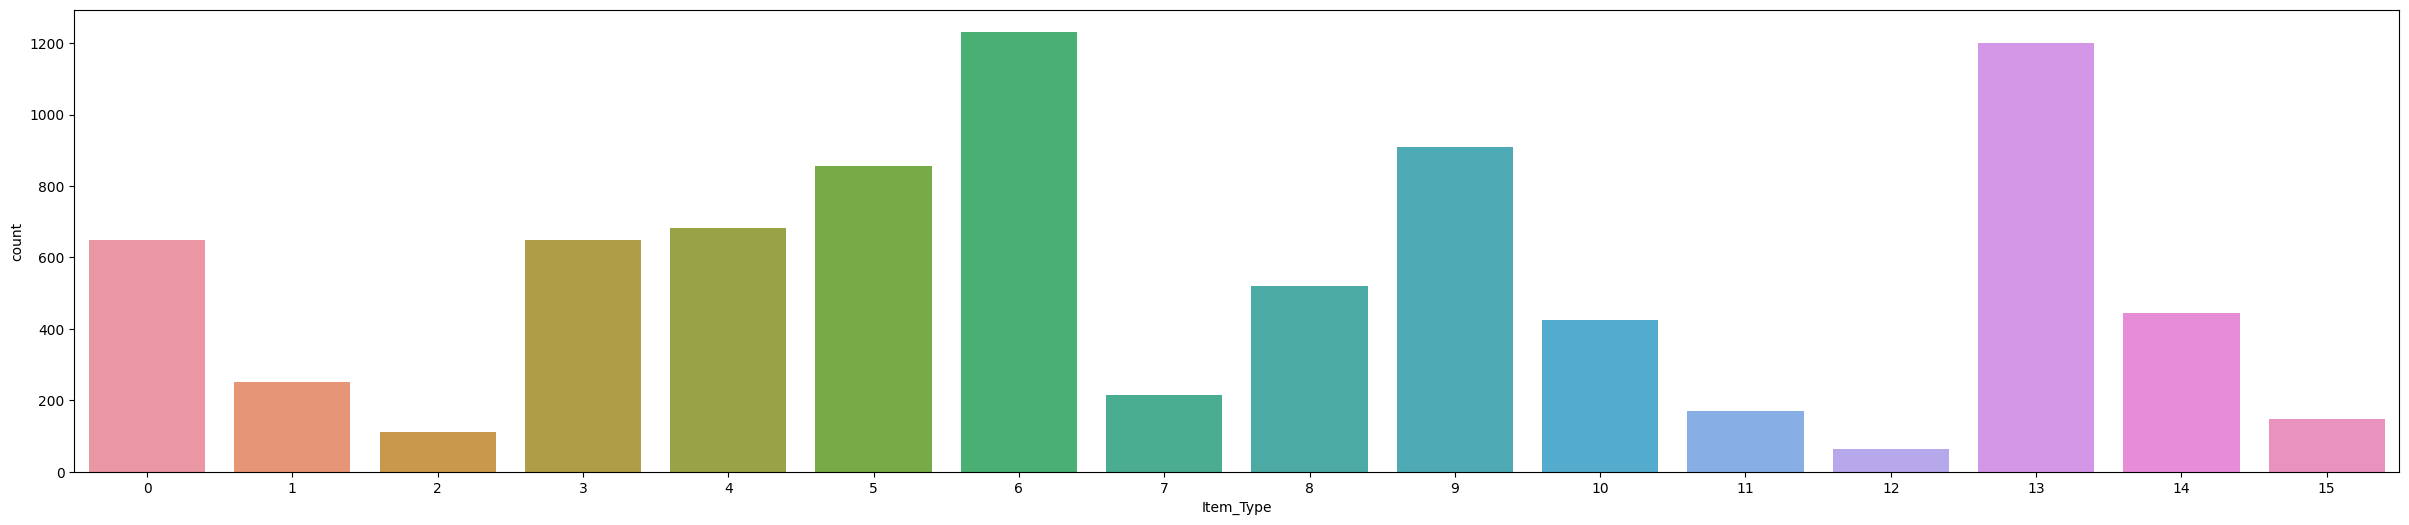

In [ ]:
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=Train_data)
plt.show()

<AxesSubplot: >

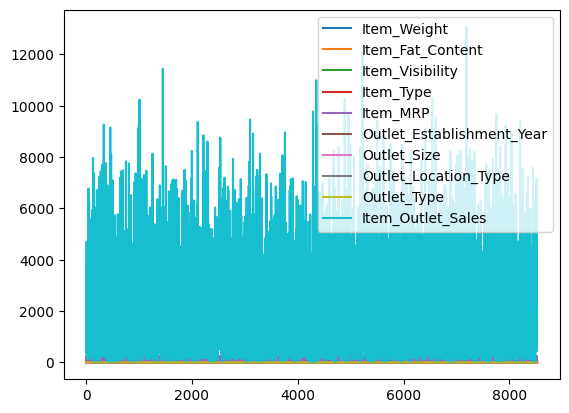

In [ ]:
Train_data.plot.line()

<AxesSubplot: >

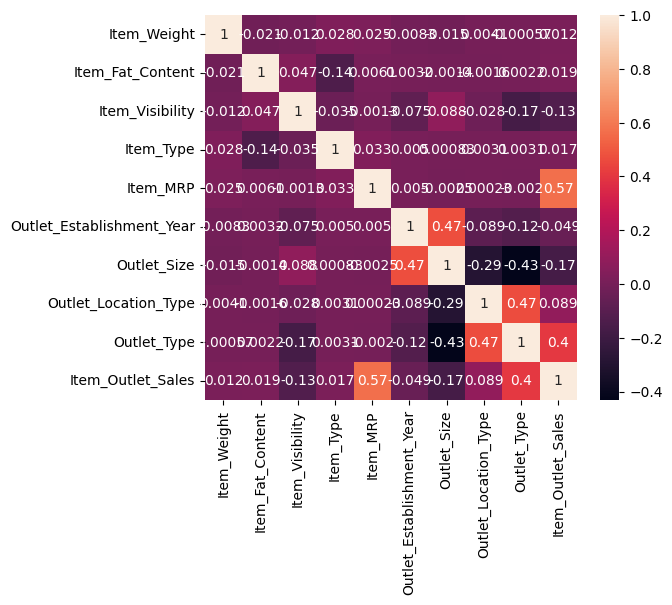

In [ ]:
plt.figure(figsize = (6,5))
sns.heatmap(Train_data.corr(),annot=True)

In [ ]:
Train_data.isnull().sum()



Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
Test_data.isnull().sum()



Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [ ]:
df=pd.concat([Train_data,Test_data], ignore_index=True)

In [ ]:
df.shape

(14204, 12)

In [ ]:
Train_data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [ ]:
Train_data['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
Train_data['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [ ]:
Train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Item_Weight,8523.0,12.857645,4.226124,4.555,9.310000,12.857645,16.000000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [ ]:
from sklearn.preprocessing import LabelEncoder
for col in Train_data.columns:
    if Train_data[col].dtype == 'object':
        lbl=LabelEncoder()
        lbl.fit(list(Train_data[col].values))
        Train_data[col]=lbl.transform(Train_data[col].values)
        
# Encoding test

for coll in Test_data.columns:
    if Test_data[coll].dtype == 'object':
        lbl=LabelEncoder()
        lbl.fit(list(Test_data[coll].values))
        Test_data[coll]=lbl.transform(Test_data[coll].values) 

uygfhjkl;

In [ ]:
Train_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.20,1,0.000000,6,182.0950,1998,3,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,1987,0,2,1,994.7052


In [ ]:
x=Train_data.drop('Item_Outlet_Sales',axis=1)
y=Train_data['Item_Outlet_Sales']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRFRegressor

In [ ]:
lr=LinearRegression()

knn = KNeighborsRegressor(n_neighbors=10)

dt = DecisionTreeRegressor(max_depth = 3)

rf = RandomForestRegressor(max_depth = 3, n_estimators=500)

ada = AdaBoostRegressor( n_estimators=50, learning_rate =.01)

gbr = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate =.2)

In [ ]:
lr = LinearRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)
from sklearn.metrics import r2_score
r1 = r2_score(y_test,y_pred)
r1

0.5028608705597093

In [ ]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(x_train,y_train)

y_pred = knn.predict(x_test)
from sklearn.metrics import r2_score,mean_absolute_error
r2 = r2_score(y_test,y_pred)
r2

0.5616608250324139

In [ ]:
dt = DecisionTreeRegressor(max_depth = 3)
dt.fit(x_train,y_train)

y_pred = dt.predict(x_test)
from sklearn.metrics import r2_score
r3 = r2_score(y_test,y_pred)
r3

0.5373350141246751

In [ ]:
rf = RandomForestRegressor(max_depth = 3, n_estimators=500)
rf.fit(x_train,y_train)

y_pred = rf.predict(x_test)
from sklearn.metrics import r2_score
r4 = r2_score(y_test,y_pred)
r4

0.549014020746746

In [ ]:
ada = AdaBoostRegressor( n_estimators=50, learning_rate =.01)
ada.fit(x_train,y_train)

y_pred = ada.predict(x_test)
from sklearn.metrics import r2_score
r5 = r2_score(y_test,y_pred)
r5

0.5389498301588038

In [ ]:
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate =.2)
gbr.fit(x_train,y_train)

y_pred = gbr.predict(x_test)
from sklearn.metrics import r2_score
r6 = r2_score(y_test,y_pred)
r6

0.5926107338950908

In [ ]:
metric_results= {'Model': ['linear Regression', 'KNeighbors', 'Decision Tree','RandomForest','AdaBoost','GradientBoosting'], 
                 'R Square': [r1, r2, r3,r4,r5,r6]}
metrics= pd.DataFrame(metric_results)
metrics

,Model,R Square
0,linear Regression,0.502861
1,KNeighbors,0.561661
2,Decision Tree,0.537335
3,RandomForest,0.549014
4,AdaBoost,0.538950
5,GradientBoosting,0.592611


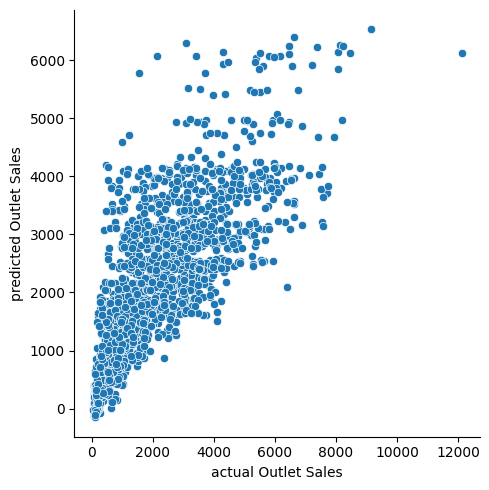

In [ ]:
prediction= pd.DataFrame({'actual Outlet Sales': y_test, 'predicted Outlet Sales': y_pred})
sns.relplot(data=prediction, x='actual Outlet Sales', y='predicted Outlet Sales')